<h1>Machine Learning - Laboratory 2 - Data manipulation</h1>

<p><b>Note</b> - Run All scripts before<p>

<h3>Exc. 1 - Filtering incorrect data</h3>



<h4>Generate random data</h4>

In [228]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pyplt

# Generate random data
np.random.seed(42)
data = {
    'A' : np.random.normal(5, .5, 100),
    'B' : np.random.normal(0, 200, 100)
}

# Add artificial outlier data
outliers = [40.5, 50.0, None, -4.0]
data['A'] = np.concatenate((data['A'], outliers))
data['B'] = np.concatenate((data['B'], outliers))

# Create data frame
df = pd.DataFrame(data)

# Clean missing data
df = df.dropna()

print(df)

            A           B
0    5.248357 -283.074148
1    4.930868  -84.129065
2    5.323844  -68.542903
3    5.761515 -160.455454
4    4.882923  -32.257142
..        ...         ...
98   5.002557   11.641744
99   4.882706  -228.59406
100      40.5        40.5
101      50.0        50.0
103      -4.0        -4.0

[103 rows x 2 columns]


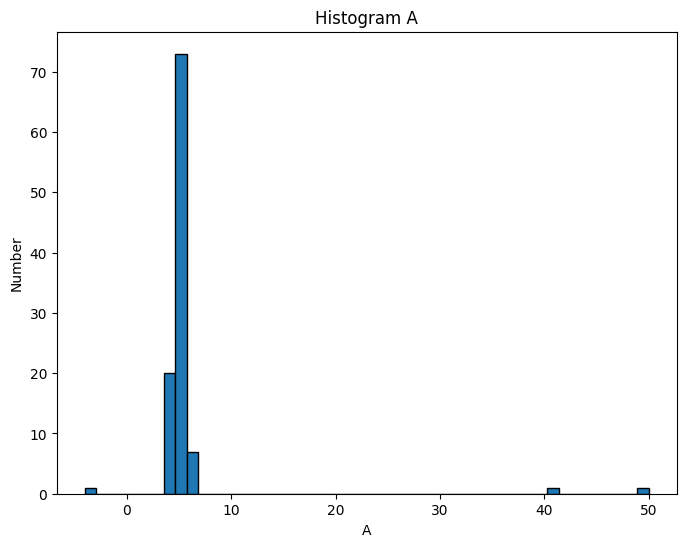

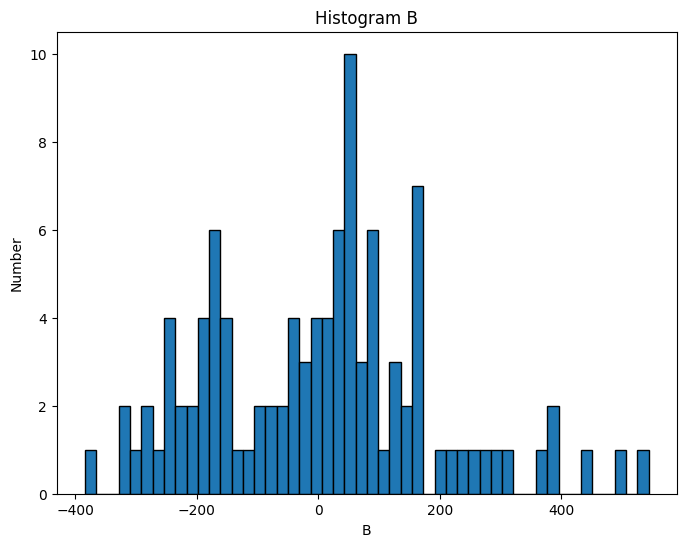

In [229]:
# Create data histogram
def create_histogram(data, feature):
    pyplt.figure(figsize=(8, 6))
    pyplt.hist(data[feature], bins=50, edgecolor = 'k')
    pyplt.xlabel(feature)
    pyplt.ylabel('Number')
    pyplt.title(f'Histogram {feature}')
    pyplt.show()

create_histogram(df, 'A')
create_histogram(df, 'B')

In [230]:
# Calculate mean value and standard deviation for given data
mean = {
    'A' : np.mean(df['A']),
    'B' : np.mean(df['B'])
}

std = mean = {
    'A' : np.std(df['A']),
    'B' : np.std(df['B'])
}

print(f"Mean: {mean}")
print(f"Standard deviation: {std}")

Mean: {'A': 5.698105779041261, 'B': 187.0815956868404}
Standard deviation: {'A': 5.698105779041261, 'B': 187.0815956868404}


In [231]:
# Delete outlier data
# If some data points are greater then +/- 3 times the standdard deviation - they can be deleted
limits = {
    'A' : [-3.9, mean['A'] + (2*std['A'])],
    'B' : [mean['B'] - (3*std['B']), mean['B'] + (3*std['B'])]
}

df = df[(df['A'] >= limits['A'][0]) & (df['A'] <= limits['A'][1])]

df = df[(df['B'] >= limits['B'][0]) & (df['B'] <= limits['B'][1])]

print(df)

           A           B
0   5.248357 -283.074148
1   4.930868  -84.129065
2   5.323844  -68.542903
3   5.761515 -160.455454
4   4.882923  -32.257142
..       ...         ...
95  4.268243   77.063476
96   5.14806 -176.771487
97  5.130528   30.745021
98  5.002557   11.641744
99  4.882706  -228.59406

[99 rows x 2 columns]


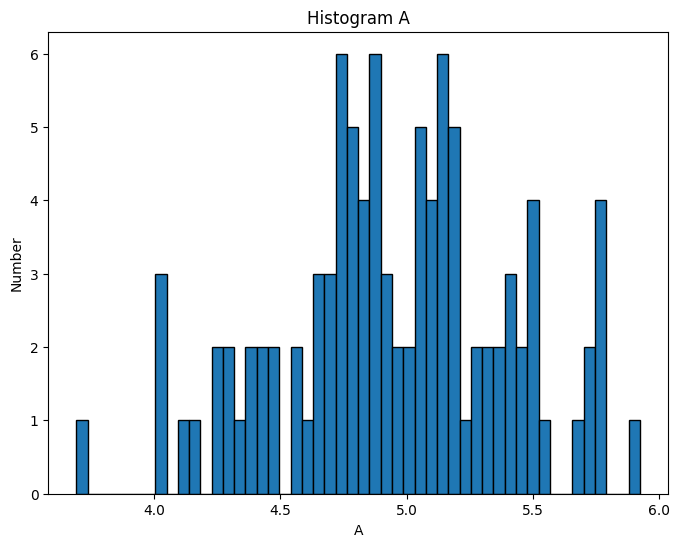

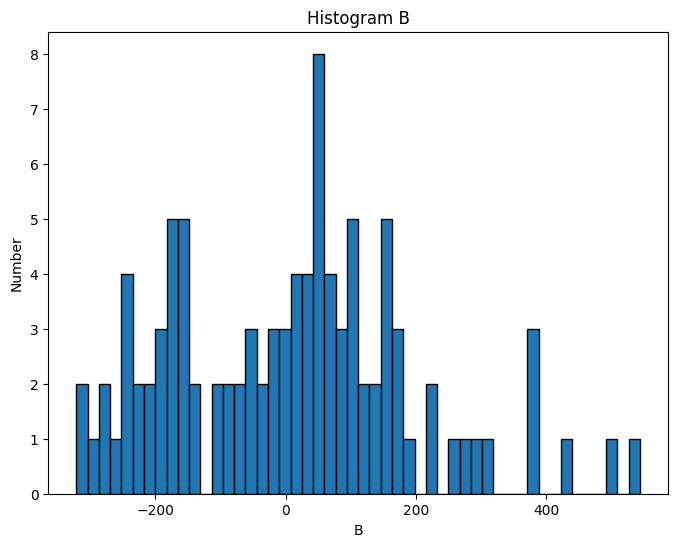

In [232]:
# Displaing cleand data
create_histogram(df, 'A')
create_histogram(df, 'B')

<h3>Exc. 2 - Data standarization</h3>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


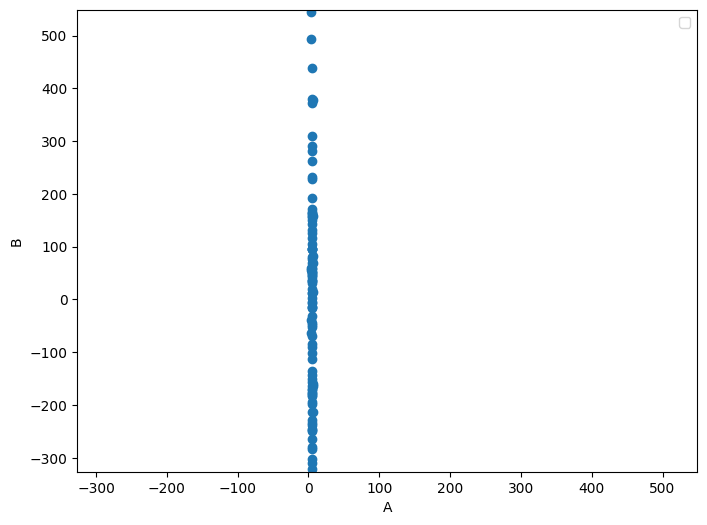

In [233]:
# Create scatter plot
def create_scatter_plot(dataset, datax, datay):
    # Scatter plot
    pyplt.figure(figsize=(8, 6))  

    allValues = np.concatenate((dataset[datax], dataset[datay]))
    lower_value = min(allValues) - 5
    upper_value = max(allValues) + 5

    pyplt.xlim([lower_value, upper_value])
    pyplt.ylim([lower_value, upper_value])
    pyplt.scatter(dataset[datax], dataset[datay])

    pyplt.xlabel(datax)
    pyplt.ylabel(datay)
    pyplt.legend()
    pyplt.show()

create_scatter_plot(df, 'A', 'B')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


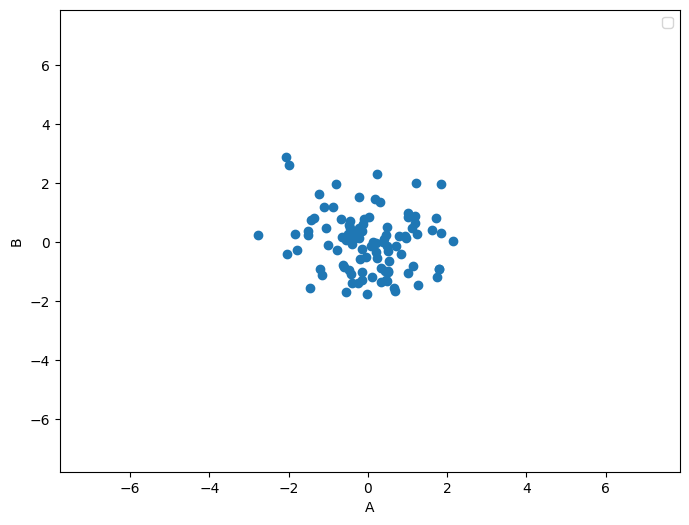

In [234]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
df[['A', 'B']] = scaler.fit_transform(df[['A', 'B']])

create_scatter_plot(df, 'A', 'B')

In [235]:
# Calculate mean value and standard deviation for given data
mean = {
    'A' : np.mean(df['A']),
    'B' : np.mean(df['B'])
}

std = mean = {
    'A' : np.std(df['A']),
    'B' : np.std(df['B'])
}

print(f"Mean: {mean}")
print(f"Standard deviation: {std}")

Mean: {'A': 1.0, 'B': 0.9999999999999999}
Standard deviation: {'A': 1.0, 'B': 0.9999999999999999}
